# Generic NN trainer

In [1]:
import sys

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")

%load_ext lab_black

sys.path.append("/Users/renero/Documents/SideProjects/trader/src")
sys.path.append("/Users/renero/Documents/SideProjects/trader/src/predictor")
sys.path.append("/Users/renero/Documents/SideProjects/trader/src/utils")
sys.path.append("/Users/renero/Documents/SideProjects/trader/src/indicators")


from cs_dictionary import CSDictionary
import networks
from strings import print_bin_predictions_match
from ticks import Ticks
from utils.plots import plot_marks

In [2]:
argv = [
    "",
    "-c",
    "../src/predictor/params.eurusd.yaml",
    "-f",
    "../data/EURUSD/EURUSD_2018_2020.csv",
    "--window",
    "14",
    "--epochs",
    "100",
    "train",
]
params = CSDictionary(args=argv)

2020-10-06 13:04:03 - INFO  - CSDictionary:__init__           - Using configuration parameters from: ../src/predictor/params.eurusd.yaml


In [3]:
ticks = Ticks(params, params.input_file).scale()
ticks.append_indicator(["trend", "median_filter", "change"])
ticks.append_indicator("gmf", monotonic_window=7, mf_window=3, sigma=5)
ticks.append_indicator("gmf_mono", monotonic_window=7, mf_window=3, sigma=5)
ticks.append_indicator("trend", column_name="gmf")
ticks.data.head()

KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET


,open,high,low,close,close_trend,med_filter,change,returns,gmf,gmf_mono,gmf_trend
Datetime,,,,,,,,,,,
2018-01-01,1.2274,1.1598,1.2794,1.2442,1.0,1.2423,0.0000,0.000000,0.001247,0.0,1.0
2018-01-02,1.2292,1.2731,1.2922,1.3358,1.0,1.2442,0.0916,0.073622,0.001905,0.0,1.0
2018-01-03,1.3218,1.2430,1.2794,1.2423,0.0,1.2753,-0.0935,-0.069996,0.003268,0.0,1.0
2018-01-04,1.2292,1.2873,1.2849,1.3449,1.0,1.2918,0.1026,0.082589,0.005403,0.0,1.0
2018-01-05,1.3309,1.2767,1.3160,1.2753,0.0,1.2753,-0.0696,-0.051751,0.008347,0.0,1.0


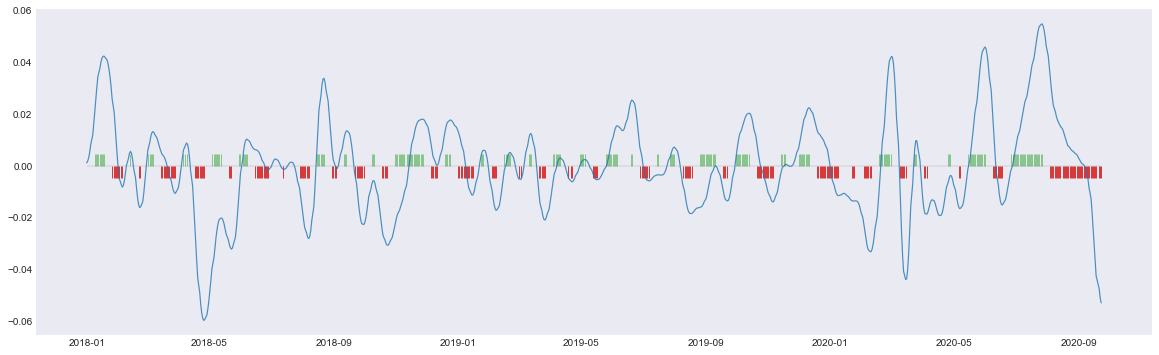

In [4]:
plot_marks(ticks.data, "gmf", "gmf_mono", True)

In [5]:
def read_ticks():
    global params

    ticks = Ticks(params, params.input_file).scale()
    ticks.append_indicator(["trend", "median_filter", "change"])
    ticks.append_indicator("gmf", monotonic_window=7, mf_window=3, sigma=5)
    ticks.append_indicator("gmf_mono", monotonic_window=7, mf_window=3, sigma=5)
    ticks.append_indicator("trend", column_name="gmf")
    return ticks


def run(X_train, y_train, X_test, y_test, experiment, network, layers, binary=False):
    global params

    method = getattr(networks, network)
    nn = method(params, n_layers=layers, binary=binary)
    nn.start_training(X_train, y_train, experiment)
    yhat, acc = nn.evaluate(X_test, y_test)
    nn.end_experiment()
    return nn, yhat, acc


def split_and_run(window_size, epochs, network, layers, binary):
    global params

    ticks = read_ticks()
    params.window_size = window_size
    params.epochs = epochs
    X_train, y_train, X_test, y_test = ticks.prepare_for_training(
        predict="gmf_trend", train_columns=["gmf"]
    )
    nn, yhat, acc = run(
        X_train, y_train, X_test, y_test, "Reproducibility", network, layers, binary
    )
    del (X_train, y_train, X_test, y_test, ticks)
    return nn, yhat, acc

In [6]:
ticks = read_ticks()
X_train, y_train, X_test, y_test = ticks.prepare_for_training(
    predict="close_trend", train_columns=["gmf"]
)
nn, yhat, acc = run(
    X_train,
    y_train,
    X_test,
    y_test,
    experiment="WoW",
    network="lstm",
    layers=1,
    binary=True,
)
print_bin_predictions_match(y_test, that)

KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET
KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET
2020-10-06 13:04:04 - INFO  - lstm:_build_model               - NN lstm_1layers created
2020-10-06 13:04:04 - INFO  - lstm:start_training             - Training for 100 epochs...

00 | 0 | 0.47 | 0 | 0.46 | 0 | 0.45 | 1 | 0.46 | 1 | 0.46 | 1 | 0.48 | 0 | 0.49 | 0 | 0.50 | 0 | 0.52 | 
09 | 1 | 0.53 | 1 | 0.55 | 0 | 0.56 | 1 | 0.57 | 0 | 0.59 | 1 | 0.60 | 1 | 0.61 | 1 | 0.63 | 0 | 0.64 | 
18 | 1 | 0.65 | 0 | 0.66 | 1 | 0.68 | 1 | 0.69 | 1 | 0.70 | 1 | 0.71 | 1 | 0.72 | 0 | 0.73 | 1 | 0.74 | 
27 | 1 | 0.75 | 1 | 0.76 | 1 | 0.77 | 1 | 0.78 | 1 | 0.79 | 1 | 0.79 | 0 | 0.80 | 1 | 0.80 | 0 | 0.80 | 
36 | 1 | 0.80 | 1 | 0.79 | 0 | 0.79 | 1 | 0.78 | 0 | 0.77 | 1 | 0.75 | 1 | 0.74 | 1 | 0.72 | 0 | 0.70 | 
45 | 0 | 0.68 | 0 | 0.67 | 0 | 0.66 | 1 | 0.65 | 1 | 0.65 | 1 | 0.64 | 1 | 0.64 | 1 | 0.63 | 1 | 0.63 | 
54 | 0 | 0.62 | 1 | 0.61 | 0 | 0.60 | 1 | 0.60 | 0 | 0.59 | 1 | 0.59 | 1 | 0.59 | 0 